# Derivatives

In [1]:
# import random
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x**2 - 4*x + 5

[31012, 30405, 29804, 29209, 28620, 28037, 27460, 26889, 26324, 25765, 25212, 24665, 24124, 23589, 23060, 22537, 22020, 21509, 21004, 20505, 20012, 19525, 19044, 18569, 18100, 17637, 17180, 16729, 16284, 15845, 15412, 14985, 14564, 14149, 13740, 13337, 12940, 12549, 12164, 11785, 11412, 11045, 10684, 10329, 9980, 9637, 9300, 8969, 8644, 8325, 8012, 7705, 7404, 7109, 6820, 6537, 6260, 5989, 5724, 5465, 5212, 4965, 4724, 4489, 4260, 4037, 3820, 3609, 3404, 3205, 3012, 2825, 2644, 2469, 2300, 2137, 1980, 1829, 1684, 1545, 1412, 1285, 1164, 1049, 940, 837, 740, 649, 564, 485, 412, 345, 284, 229, 180, 137, 100, 69, 44, 25, 12, 5, 4, 9, 20, 37, 60, 89, 124, 165, 212, 265, 324, 389, 460, 537, 620, 709, 804, 905, 1012, 1125, 1244, 1369, 1500, 1637, 1780, 1929, 2084, 2245, 2412, 2585, 2764, 2949, 3140, 3337, 3540, 3749, 3964, 4185, 4412, 4645, 4884, 5129, 5380, 5637, 5900, 6169, 6444, 6725, 7012, 7305, 7604, 7909, 8220, 8537, 8860, 9189, 9524, 9865, 10212, 10565, 10924, 11289, 11660, 12037, 124

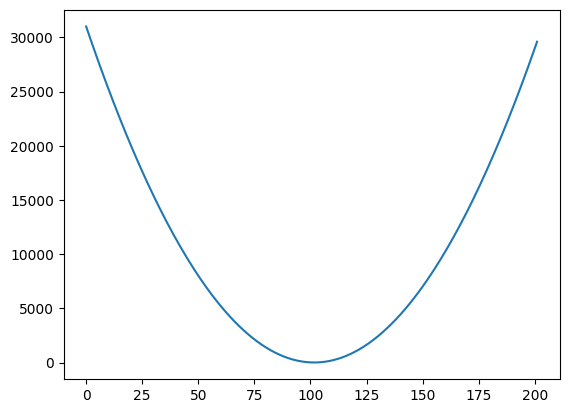

In [2]:
#---// Making a data set for a graph //-------

l = []
for i in range(-101, 101):
    l.append(f(i))

print(l)
#-----// Making the graph //------------

plt.plot(l)
plt.show() 



In [3]:
# Example of derivartive by definition


h = 0.00001
x = 2/3
print((f(x+h) - f(x))/h)

3.0000002482211127e-05


In [4]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [5]:


from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot



In [29]:
draw_dot(L)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH